# **Watching lynx over the years**

Goal: ensure the quality of the dataset.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from pathlib import Path

pd.set_option('display.max_colwidth', None)

## **Load csv and convert date column**

In [104]:
df = pd.read_csv(Path("/gpfsscratch/rech/ads/commun/datasets/extracted/lynx_dataset_full_v2.csv"))

/tmp/ipykernel_1271195/2224559848.py:1: DtypeWarning: Columns (2,3,4,5,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path("/gpfsscratch/rech/ads/commun/datasets/extracted/lynx_dataset_full_v2.csv"))


In [105]:
def convert_date(date_str, country):
    if country == 'France':
        return pd.to_datetime(date_str, format='%Y-%m-%d', errors='coerce')
    else:
        return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [106]:
df['date'] = df.apply(lambda row: convert_date(row['date'], row['country']), axis=1)

In [107]:
df.head()[['filepath', 'lynx_id', 'date', 'country']]

,filepath,lynx_id,date,country
0,/gpfsscratch/rech/ads/commun/datasets/extracted/france/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OCS/OCS_Van-Gogh/Van-Gogh_OCS_NA_2012-04-27_NA_5.JPG,van-gogh_FR,2012-04-27,France
1,/gpfsscratch/rech/ads/commun/datasets/extracted/france/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OCS/OCS_Van-Gogh/Van-Gogh_OCS_NA_2012-05-05_NA_1.JPG,van-gogh_FR,2012-05-05,France
2,/gpfsscratch/rech/ads/commun/datasets/extracted/france/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OCS/OCS_Van-Gogh/Van-Gogh_OCS_NA_2012-03-17_NA_3.JPG,van-gogh_FR,2012-03-17,France
3,/gpfsscratch/rech/ads/commun/datasets/extracted/france/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OCS/OCS_Van-Gogh/Van-Gogh_OCS_NA_2012-03-16_NA_6.JPG,van-gogh_FR,2012-03-16,France
4,/gpfsscratch/rech/ads/commun/datasets/extracted/france/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OCS/OCS_Van-Gogh/Van-Gogh_OCS_NA_2012-03-05_NA_7.JPG,van-gogh_FR,2012-03-05,France


## **Keep only rows with a date**

In [111]:
filtered_df = df[df['date'].notna()]
filtered_df['country'].unique()

array(['France', 'croatia', 'slovenia'], dtype=object)

In [112]:
lynx_id_counts = filtered_df['lynx_id'].value_counts()
lynx_id_counts

lynx_id
goru_SI               455
f39-060_FR            243
draga2_SI             199
osilnica2_SI          153
teja(malagora1)_SI    109
                     ... 
platak 7_HR             1
platak 6_HR             1
arabella_HR             1
pangea_HR               1
risovac 2d_HR           1
Name: count, Length: 501, dtype: int64

## **Display of a random image per year of a random lynx**

### **Get the year of the image**

In [114]:
filtered_df['year'] = filtered_df['date'].dt.year

/tmp/ipykernel_1271195/505010961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['date'].dt.year


In [115]:
filtered_df['year'].unique()

array([2012, 2022, 2018, 2017, 2020, 2015, 2016, 2014, 2021, 2019, 2011,
       2010, 2013, 2006, 2007, 2009, 2008, 2023], dtype=int32)

In [118]:
lynx_years = filtered_df.groupby('lynx_id')['year'].nunique()
lynx_years

lynx_id
100_FR          1
1015_FR         1
1017_FR         1
1018_FR         1
1033=l286_FR    4
               ..
zdrocle1_SI     4
zdrocle2_SI     3
zita_HR         2
zois_SI         1
šiljo_HR        1
Name: year, Length: 501, dtype: int64

### **Only lynx with at least two images in two different years are kept**

In [119]:
lynx_with_multiple_years = lynx_years[lynx_years >= 2].index
lynx_with_multiple_years

Index(['1033=l286_FR', '1079_FR', '1098_FR', '1121_FR', '1128_FR', '1185_FR',
       '1208_FR', '1224_FR', '1225_FR', '1254_FR',
       ...
       'tris_SI', 'trubaja_HR', 'unico (lbih01)_HR', 'vedran_HR', 'vilim_HR',
       'vitrenka_HR', 'zarez_HR', 'zdrocle1_SI', 'zdrocle2_SI', 'zita_HR'],
      dtype='object', name='lynx_id', length=216)

### **Select a random lynx**

In [126]:
selected_lynx_id = np.random.choice(lynx_with_multiple_years)
selected_lynx_id

'vilim_HR'

In [127]:
selected_df = filtered_df[filtered_df['lynx_id'] == selected_lynx_id]
selected_df[['filepath', 'lynx_id', 'date']]

,filepath,lynx_id,date
3482,/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/Mesinovac_09.02.2020.JPG,vilim_HR,2020-02-09 14:16:00
3484,/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/4_02_2020_3.34_left_side.JPG,vilim_HR,2020-02-04 02:32:00
3486,/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/27_01_2020_20.53_right_side.JPG,vilim_HR,2020-01-27 19:53:00
3487,/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/27_01_2020_20.53_left_side.JPG,vilim_HR,2020-01-27 19:53:00
3490,/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/3_02_2020_18.26_left_side.JPG,vilim_HR,2020-02-03 17:13:00
...,...,...,...
4665,/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/I_00008c_p1s9ftp.JPG,vilim_HR,2023-04-18 11:51:00
4666,/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/I_00017c_0KdPMyt.JPG,vilim_HR,2023-04-19 19:23:00
4667,/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/I_00021a_XqddmGU.JPG,vilim_HR,2023-04-23 16:24:00
4705,/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/I_00005a_jedZtur.JPG,vilim_HR,2023-06-11 09:33:00


### **Select one random image per year for this lynx**

In [128]:
images_per_year = selected_df.groupby('year').sample()
images_per_year

,filepath,lynx_id,source,pattern,date,location,image_number,conf,x,y,...,country,filepath_no_bg,score_sam,number_animals,number_children,sex,side,latitude,longitude,year
3490,/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/3_02_2020_18.26_left_side.JPG,vilim_HR,Veterinarski fakultet,NaN,2020-02-03 17:13:00,NaN,5,0.954,628.8016,718.9776,...,croatia,/gpfsscratch/rech/ads/commun/datasets/extracted/no_background_new/croatia/Vilim/no_bg_5_3_02_2020_18.26_left_side.JPG,0.965575,1.0,0.0,Male,left,15.043362,44.881497,2020
3792,/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/3._sterna_21.02..JPG,vilim_HR,Veterinarski fakultet,NaN,2021-02-21 13:12:00,NaN,34,0.954,722.8256,953.9072,...,croatia,/gpfsscratch/rech/ads/commun/datasets/extracted/no_background_new/croatia/Vilim/no_bg_34_3._sterna_21.02..JPG,0.976578,1.0,0.0,Male,right,15.043362,44.881497,2021
4120,/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/PICT0009_nRr43sF.JPG,vilim_HR,PP Velebit,NaN,2022-02-26 17:57:00,NaN,64,0.941,2145.6000,1560.9000,...,croatia,/gpfsscratch/rech/ads/commun/datasets/extracted/no_background_new/croatia/Vilim/no_bg_64_PICT0009_nRr43sF.JPG,0.972439,1.0,0.0,Male,right,15.043362,44.881497,2022
4705,/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/I_00005a_jedZtur.JPG,vilim_HR,PP Velebit,NaN,2023-06-11 09:33:00,NaN,87,0.967,3451.8400,1911.7824,...,croatia,/gpfsscratch/rech/ads/commun/datasets/extracted/no_background_new/croatia/Vilim/no_bg_87_I_00005a_jedZtur.JPG,0.979915,1.0,0.0,Male,left,15.043362,44.881497,2023


### **Plot**

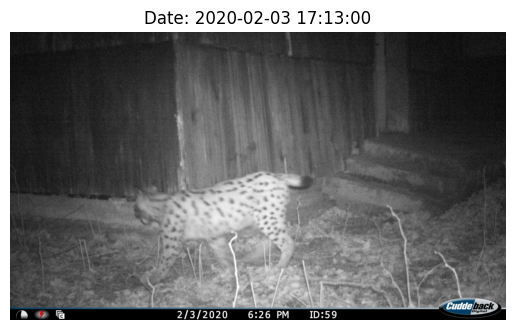

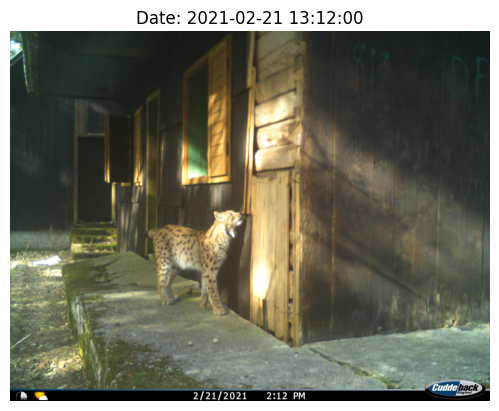

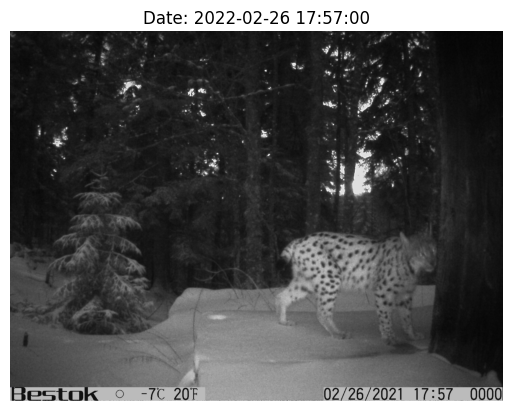

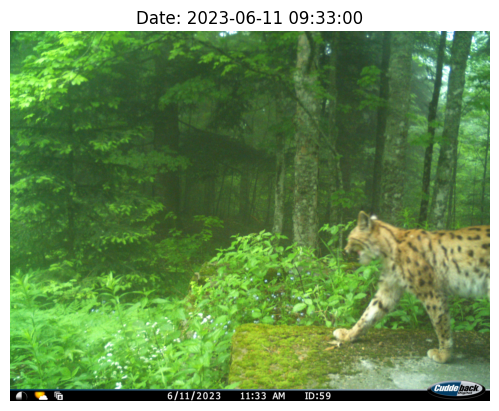

Lynx selected: vilim_HR


In [131]:
for _, row in images_per_year.iterrows():
    filepath = row['filepath']
    date = row['date']
    
    img = Image.open(filepath)
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Date: {date.strftime("%Y-%m-%d %H:%M:%S")}')
    plt.show()

print(f"Lynx selected: {selected_lynx_id}")